# Домашняя работа «Оценка точности модели, переобучение, регуляризация» обновленное

Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.
Этапы работы:


2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
9. Сформулируйте выводы по проделанной работе:

    a. как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
    
    b. *может ли ROC-кривая проходить ниже диагонали?
    
Результат:
проведена оценка качества модели классификации;
реализован подсчет «вручную» основных метрик, проведено сравнение полученных результатов с готовыми функциями из библиотеки sklearn.

# Загрузка данных и библиотек

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno    #библиотека визуализации пропусков

from itables import init_notebook_mode  # интерактивные таблицы расширения `itables`
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [14]:
data_load = pd.read_csv('athletes.csv')

In [15]:
data_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [16]:
data_load

id                name nationality     sex       dob  height  \
0      736041664      A Jesus Garcia         ESP    male  10/17/69    1.72   
1      532037425          A Lam Shin         KOR  female   9/23/86    1.68   
2      435962603         Aaron Brown         CAN    male   5/27/92    1.98   
3      521041435          Aaron Cook         MDA    male    1/2/91    1.83   
4       33922579          Aaron Gate         NZL    male  11/26/90    1.81   
...          ...                 ...         ...     ...       ...     ...   
11533  265605954  Zurian Hechavarria         CUB  female   8/10/95    1.64   
11534  214461847      Zuzana Hejnova         CZE  female  12/19/86    1.73   
11535   88361042             di Xiao         CHN    male   5/14/91    1.85   
11536  900065925   le Quoc Toan Tran         VIE    male    4/5/89    1.60   
11537  711404576      le Roux Hamman         RSA    male    1/6/92    1.85   

       weight          sport  gold  silver  bronze  
0        64.0      athletics     0       0       0  
1        56.0        fencing     0       0       0  
2        79.0      athletics     0       0       1  
3        80.0      taekwondo     0       0       0  
4        71.0        cycling     0       0       0  
...       ...            ...   ...     ...     ...  
11533    58.0      athletics     0       0       0  
11534    63.0      athletics     0       0       0  
11535   100.0      wrestling     0       0       0  
11536    56.0  weightlifting     0       0       0  
11537    70.0      athletics     0       0       0  

[11538 rows x 11 columns]

## 1. Преобразуйте данные:

###     a. Проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;

In [19]:
# удаляются столбцы id, name, dob за ненадобностью
data = data_load.drop(columns=['id', 'name', 'dob'])
data

nationality     sex  height  weight          sport  gold  silver  bronze
0             ESP    male    1.72    64.0      athletics     0       0       0
1             KOR  female    1.68    56.0        fencing     0       0       0
2             CAN    male    1.98    79.0      athletics     0       0       1
3             MDA    male    1.83    80.0      taekwondo     0       0       0
4             NZL    male    1.81    71.0        cycling     0       0       0
...           ...     ...     ...     ...            ...   ...     ...     ...
11533         CUB  female    1.64    58.0      athletics     0       0       0
11534         CZE  female    1.73    63.0      athletics     0       0       0
11535         CHN    male    1.85   100.0      wrestling     0       0       0
11536         VIE    male    1.60    56.0  weightlifting     0       0       0
11537         RSA    male    1.85    70.0      athletics     0       0       0

[11538 rows x 8 columns]

In [20]:
# подсчёт процента пропусков
(data.isna().sum() / len(data)).round(4) * 100

nationality    0.00
sex            0.00
height         2.86
weight         5.71
sport          0.00
gold           0.00
silver         0.00
bronze         0.00
dtype: float64

<Axes: >

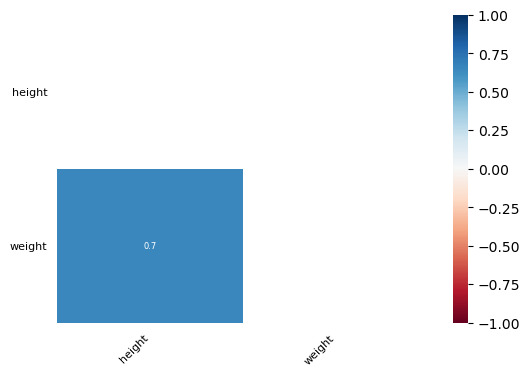

In [21]:
# визуализация корреляции пропусков показывает, что рост отсутствует в 70% при отсутствии веса
msno.heatmap(data, figsize=(6, 4), fontsize=8)

In [7]:
# корреляция в более подробных цифрах
data[['dob', 'height', 'weight']].isnull().corr()

dob    height    weight
dob     1.000000  0.054258  0.037827
height  0.054258  1.000000  0.650126
weight  0.037827  0.650126  1.000000

In [8]:
# группировка фрейма по виду спорта для определения внутригрупповой медианы
data_all = data.copy()
data_group = data_all.groupby('sport')

In [9]:
# определение внутригруппового медиаонного роста
data_height = data_group.height.median()
# опрделение внутригруппового медианного веса
data_weight = data_group.weight.median()

In [10]:
# замена пропусков в столбцах медианными значениями в рамках вида спорта
data_all.height = data_group.height.transform(lambda x: x.fillna(x.median()))
data_all.weight = data_group.weight.transform(lambda x: x.fillna(x.median()))

In [11]:
# вариант записи одной строкой
# data_all['height'] = data_all.groupby('sport')['height'].transform(lambda x: x.fillna(x.mean()))
# data_all['weight'] = data_all.groupby('sport')['weight'].transform(lambda x: x.fillna(x.mean()))

In [12]:
# проверка заполнения весов по категориям
data_all.groupby('sport')['weight'].count().sort_values()

sport
boxing                  0
modern pentathlon      72
triathlon             110
golf                  120
archery               128
taekwondo             128
badminton             172
table tennis          172
tennis                196
equestrian            222
fencing               246
weightlifting         258
basketball            288
rugby sevens          300
gymnastics            324
canoe                 331
wrestling             353
handball              363
sailing               380
volleyball            384
shooting              390
judo                  392
hockey                432
cycling               525
rowing                547
football              611
aquatics             1445
athletics            2363
Name: weight, dtype: int64

In [13]:
(data_all.isna().sum() / len(data_all)).round(4) * 100

id             0.00
name           0.00
nationality    0.00
sex            0.00
dob            0.01
height         0.00
weight         2.48
sport          0.00
gold           0.00
silver         0.00
bronze         0.00
dtype: float64

### b. закодируйте категориальные переменные числовыми значениями по необходимости.